<a href="https://colab.research.google.com/github/asjaradja/CompMethBioPhys/blob/main/Professor%20Class%20notes/Topic_1_ODE_based_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ordinary Differential Equations Review
Ordinary differential equation (ODE) based models are very common in biophysics. An ordinary differential equation is an equation which is defined for one or more functions of one independent variable and its derivatives. $\frac{dy}{dx}=x+1$ is an example of ODE. The word ordinary is meant to indicate a single independent variable (if there are multiple, the equation would have to use partial derivatives and would be called a partial differential equation).

We will focus mostly on **first order** ordinary differential equations. The order of ordinary differential equations is defined to be the order of the highest derivative that occurs in the equation. A first order ordinary differential equation has only the first derivative $\frac{dy}{dx}$.

A quick note on notation: remember that $y'≡\frac{dy}{dx}$ so you may see one or the other in different sources, and they mean the same thing.

### Test your understanding
Which of these is a first order ordinary differential equation?
1. $y'+\frac{1}{x}y=2$
2. $y''-9y=0$
3. $\frac{du}{dx}+\frac{du}{dy}=2$

###Solution
a





# Examples of ODEs in biophysics
Despite the enormous diversity of living systems, there are certain universal properties one can study and model: growth, self-restriction of growth, competition, spatial nonhomogeneity, and many more. All these properties can be modeled with simple ODEs. We will spend today learning about a few of these!

##Example 1: Unlimited growth
Let's try to model the growth of bacteria in a culture. Bacteria grow by asexual reproduction: a single bacteria divides into 2 daughter cells.

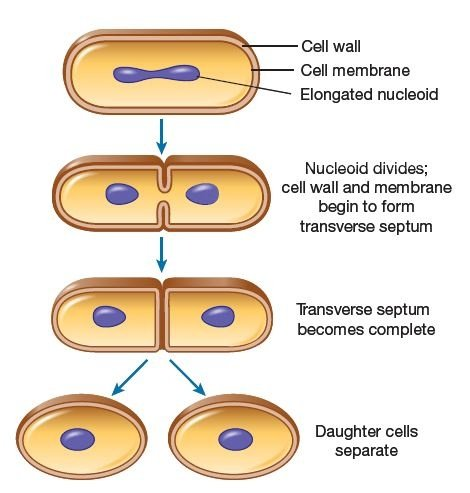

Imagine you take a test tube, add one bacteria to it and add some growth medium (i.e. food for the bacteria so it'll be happy and divide). You then leave your tube for a couple of days and come back to many more bacteria inside.

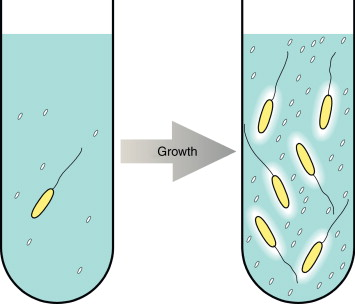

Now let's pretend like we can take data to count the number of bacteria as a function of time. People do this all the time in real experiments, and this is a real graph of results from this kind of experiment:



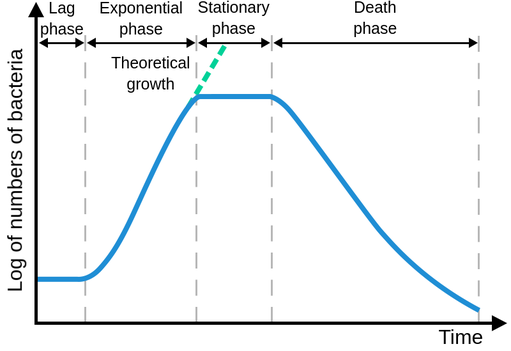

### What are the different parts of this graph that you notice? Discuss.

Lag phase: We see that at first, the number of bacteria doesn't change. This is called the lag phase and just represents the time during which the bacteria are not yet dividing.

Exponential phase: Next, we see that the bacteria start dividing and their numbers increase. **Why do you think we call this the exponential growth phase if the line is straight (i.e. looks linear)?**

Stationary phase and death phase: we won't model these phases yet, but you can see that at some point, the bacteria stop dividing and after their numbers decrease as they die.


### Modeling bacterial growth

What do you think the rate of growth should be proportional too? Think as simply as possible (and you can assume that they have enough food and good conditions to be happy).

The rate of growth is proportional to the population numbers! This is one of the fundamental assumptions underlying all models of growth.

#### How do you represent this in an equation?
Let x be your number of bacteria and t be time

$\frac{dx}{dt}=Rx$, where R is some growth rate that depends on the specifics of your growth scenario.

### What is the solution to this equation?

$ x(t) = x_0 e^{Rt} $

### Plotting

This equation is valid at a certain growth stage for the cell populations in a tissue, for algae or bacteria in a culture.

Plot the above x(t) function for $t = 0-5$, $x_0 = 2$ and $R=1$

In [ ]:
# Write code here

Text(0.5, 1.0, 'Exponential function')

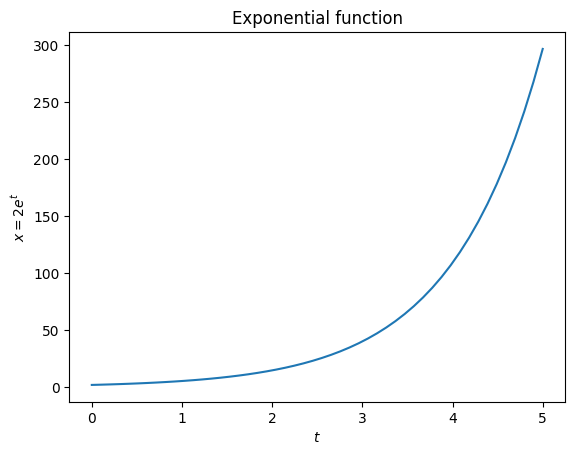

In [5]:
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0, 5)
x = 2* np.exp(t)

plt.figure()
plt.plot(t, x)
plt.xlabel("$t$")
plt.ylabel("$x=2 e^t$")
plt.title("Exponential function")

Now plot it as a semi-log graph (with the y-axis as the log). Does your plot match what the data showed above?

In [ ]:
# write code here

Text(0.5, 1.0, 'Exponential function')

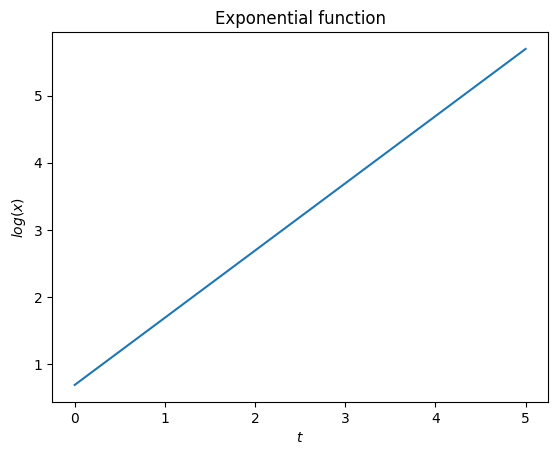

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0, 5)
x = np.log(2* np.exp(t))

plt.figure()
plt.plot(t, x)
plt.xlabel("$t$")
plt.ylabel("$log(x)$")
plt.title("Exponential function")

##Example 2: Bounded growth

Now let's include the second part of the data (the part where the growth stops and the population stays constant for a period of time). This is called bounded growth and represents a realistic situation in which, let's say, the bacteria in your tube have eaten all of the food available and there is no more left so they stop reproducing (and stay alive for a time period before dying). Other examples of bounded growth include limitations of space available for a cell population in a tissue, the food base, or refuge for superior animals.

A basic model that describes bounded or limited growth is called the **Verhulst model** (1848) (it is also called a "logistic function"). Verhulst created this model by modifying the classical growth-decay equation $\frac{dx}{dt}= Rx$, replacing $R$ by $r(1-\frac{x}{K})$.

The Verhulst equation is:

$\frac{dx}{dt}=rx(1-\frac{x}{K})$

where $K$ is the "population capacity" and $r$ is some growth rate

Why do you think K is called the "population capacity"?

The solution to the Verhulst model takes a little time to solve for (you have to use the method of partial fractions when taking the integral over x), so I'll just give you the continuous solution for now:

$x(t)=\frac{Kx_0 e^{rt}}{K+x_0 (e^{rt}-1)}$

If you're curious, try to solve it on your own and check your answer here: https://www2.clarku.edu/faculty/djoyce/ma121/logistic.pdf

$x_0$ is the initial population size, $K$ is again the population capacity, and $r$ is some rate of growth.

Let's plot this function to see what logistical growth looks like for $K=3$, $x_0=1$, and $r=1$

$x(t)=\frac{3e^{t}}{e^{t}+2}$

Text(0.5, 1.0, 'Verhulst model')

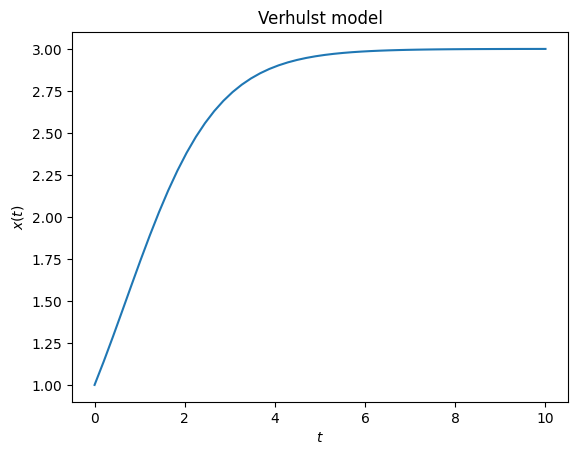

In [2]:
t = np.linspace(0, 10)
x = (3*np.exp(t))/(np.exp(t)+2)

plt.figure()
plt.plot(t, x)
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.title("Verhulst model")

What do you notice in your plot? Does it match the original data we had plotted?

There are many other modifications that can be made to these models to represent other scenarios such as growth rates dependent on a variety of variables, death rates after a population has exhausted its food supply, and many more. You will explore some more cases in your homework!

## Competition and Predatory-prey models

Let's move on to systems of equations that you can use to model a variety of biological situations where there are two or more components.

Biological systems interacts with each other at all levels. On small scales, macromolecules interact with each other in the process of biochemical reactions. At larger scales, different species in populations interact with each other (by eating or competing with other species). The kinetics of these processes are described in mathematical models, as a rule, by a systems of equations for probabilities of the states.

We will now explore a simple predator-prey system, where one species eats another.



In the classic example, a predator (say foxes) feeds on prey (say rabbits) which in turn feed on some third food item readily available such as vegetation. The original classical example was developed in the 1920’s by Vito Volterra (an Italian mathematician) to study the cyclic variations in shark and fish food populations in the Adriatic Sea. Notice the word cyclic! It has been observed in nature for a long time that populations of predator-prey species cycle or oscillate. For example, the Hudson Bay Company which traded in animal furs in Canada kept records of populations of both the lynx and its prey the snowshoe hare:

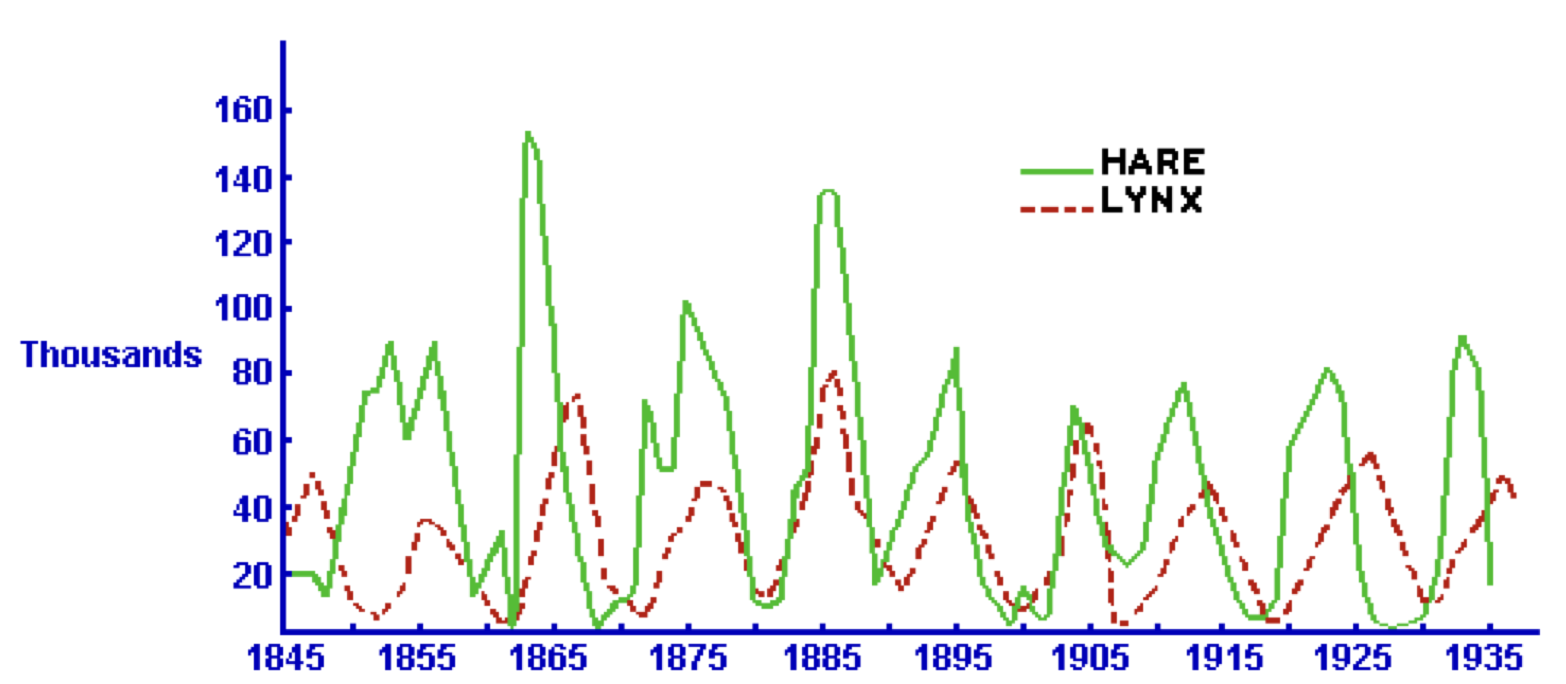


In our model we will assume the following:
1. Prey will exhibit unlimited growth when predators are not around.
2. Predators depend on the presence of their prey to survive.
3. The rate of predation depends on the likelihood that a prey is encountered by the predator.
4. The growth rate of the predator population is proportional to food intake (rate of predation).

Let's now try to put these assumptions into the form of mathematical equations! Let's use $A(t)$ to describe the prey and $B(t)$ to describe the predators.

What should the equation for assumption 1 be?

$\frac{dA}{dt}=R_1 A$ where $R_1$ is the growth rate of prey

What should the equation for assumption 2 be?

$\frac{dB}{dt}=-R_2 B$ where $R_2$ is the death rate of predators

Now let's think about how these two equations would be altered if we include assumptions 3 and 4 where prey numbers go down with predators around, and predator numbers go up with prey around.

Prey suffers an interaction rate of decline: $\frac{dA}{dt}=R_1 A - R_3 AB$

where $R_3$ is the rate of predation, and the likelihood of an encounter between the predators and prey is $A x B$

Similarly, predators benefit from an interaction: $\frac{dB}{dt}=-R_2 B + R_4 AB$

where $R_4$ is the growth rate of predators in the presence of prey, and the likelihood of an encounter between the predators and prey is again $A x B$

These two equations:

$\frac{dA}{dt}=R_1 A - R_3 AB$

$\frac{dB}{dt}=-R_2 B + R_4 AB$

are called the Lotka-Volterra predator-prey equations!

These equations are nonlinear because of the AB terms and they are coupled as the equations contain both variables. Although this system of equations cannot be explicitly solved (we can't write down an exact solution for $A(t)$ and $B(t)$ to plot, we can numerically study this model.

Let's set some variables first: let the initial number of prey be 10 ($A_0 = 10$) and the initial number of predators be 5 ($B_0=5$). Let's also define a function that has the four rates as arguments.

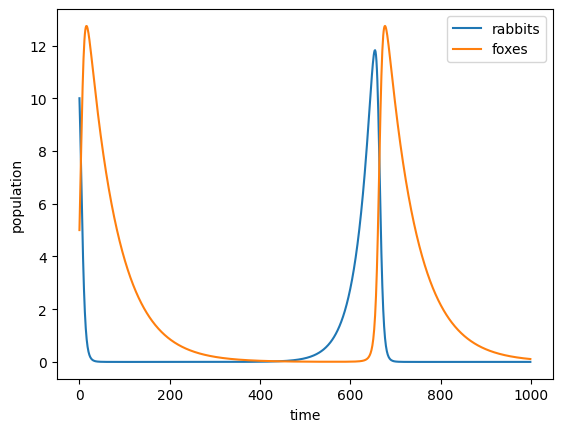

In [14]:
from scipy import integrate
t = np.linspace(0, 15, 1000)  # time
X0 = np.array([10, 5])  # initials conditions: 10 rabbits and 5 foxes

def f(a, b, c_, d):
    def dX_dt(X, t=0):
        """Return the growth rate of fox and rabbit populations."""
        rabbits, foxes = X
        dRabbit_dt = a * rabbits - b * foxes * rabbits
        dFox_dt = -c_ * foxes + d * b * rabbits * foxes
        return [dRabbit_dt, dFox_dt]

    X, _ = integrate.odeint(dX_dt, X0, t, full_output=True)
    return X

plt.plot(f(2,1.2,1,0.9), label=["rabbits", "foxes"])
plt.xlabel("time")
plt.ylabel("population")
plt.legend()